In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import cv2
import imageio

In [17]:
data_path = Path('data old')

frames = []
times = []
# Load the data
for frame_path in sorted(data_path.glob('*.npy')):
	times.append(float(frame_path.stem[6:]))
	frame = np.load(frame_path)
	frames.append(frame)

In [18]:
depths = []
with imageio.get_writer('movie.gif', mode='I') as writer:
	for frame in frames:
		depth_crop = frame[160:300, 210:410]
		depth_mean = np.mean(depth_crop)
		depths.append(depth_mean)
		depth_vis = (frame.copy().astype(np.float64) / 1000 * 256)
		depth_vis = np.clip(depth_vis, 0, 255).astype(np.uint8)
		depth_vis = cv2.applyColorMap(depth_vis.astype(np.uint8), cv2.COLORMAP_INFERNO)

		writer.append_data(depth_vis)

Text(0, 0.5, 'Depth (mm)')

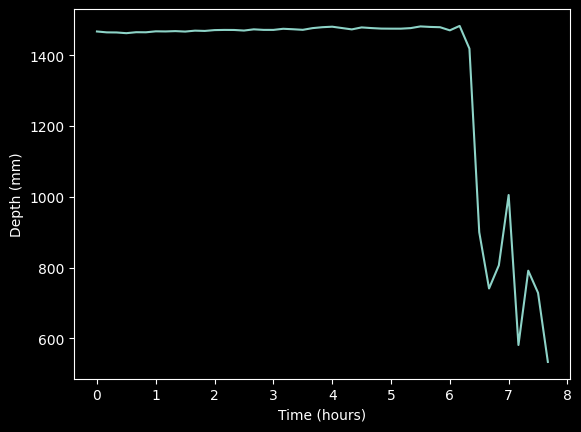

In [19]:
plt.plot((np.array(times) - times[0])/60/60, depths)
plt.xlabel('Time (hours)')
plt.ylabel('Depth (mm)')

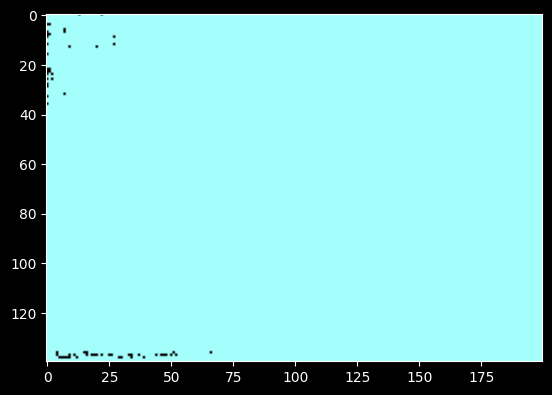

In [6]:
depth_vis = (frames[0].copy().astype(np.float64) / 1000 * 255)
depth_vis = np.clip(depth_vis, 0, 255).astype(np.uint8)
depth_vis = cv2.applyColorMap(depth_vis.astype(np.uint8), cv2.COLORMAP_INFERNO)
plt.imshow(depth_vis[160:300, 220:420])

In [20]:
import pandas as pd

df = pd.DataFrame({'time': times, 'depth': depths})
df.to_excel('depths.xlsx', index=False)